In [1]:
#Importing packages and dataset
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

data = pd.read_csv('Advertising.csv', index_col = 0)
#Since, in the data the 0th index ('Unnamed_Column') represents index. Specifying that in the dataframe so the he column is treated as an index instead of a seperate column

In [2]:
#Checking if the data is imported properly
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
#Checking dimensions of the data
data.shape

(200, 4)

In [4]:
#Checking for Null Values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

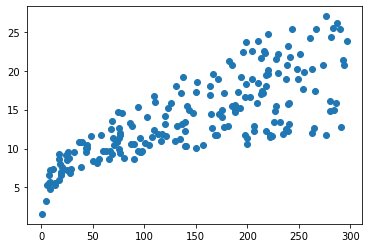

In [5]:
#Plotting a catter-plot to understand the data better, presently doing a simple linear regression (1 predictor).
plt.scatter(data['TV'], data['Sales'])

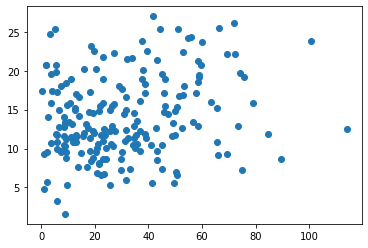

In [6]:
plt.scatter(data['Newspaper'], data['Sales'])

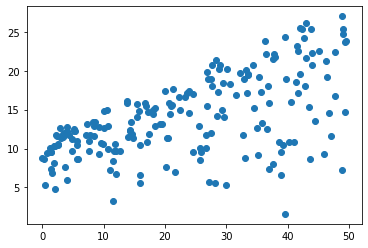

In [7]:
plt.scatter(data['Radio'], data['Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e162db2ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e162db7a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e162dabf08>],
 'medians': [<matplotlib.lines.Line2D at 0x1e162dbca08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e162dbcb08>],
 'means': []}

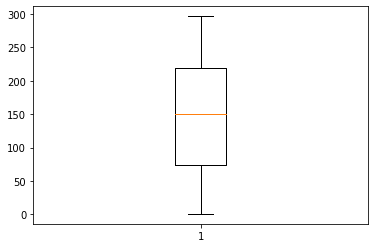

In [8]:
plt.boxplot(data['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e162e20448>,
 'caps': [<matplotlib.lines.Line2D at 0x1e162e20d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e162e1d988>],
 'medians': [<matplotlib.lines.Line2D at 0x1e162e23c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e162e28b08>],
 'means': []}

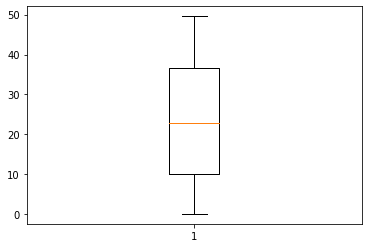

In [9]:
plt.boxplot(data['Radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e162e8b848>,
 'caps': [<matplotlib.lines.Line2D at 0x1e162e8bf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e162e87dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e162e90f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e162e95f08>],
 'means': []}

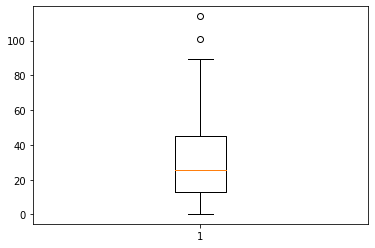

In [10]:
plt.boxplot(data['Newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e162ef8f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1e162efaf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e162ef85c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e162efeec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e162efefc8>],
 'means': []}

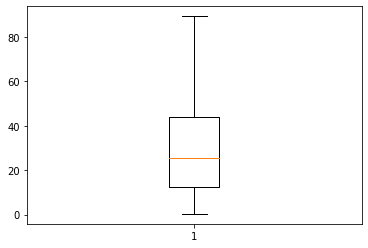

In [11]:
#Outliers present in data, since there're only 2 records removing them won't make much of a difference
drop_index = data[data['Newspaper'] > 100].index
data.drop(drop_index, inplace = True)
plt.boxplot(data['Newspaper'])

In [12]:
#Since the Last column specifies the Y (dependent) variable, seperating out the independent and dependent variable.
X = data.iloc[:, :-1]
y = data['Sales']

In [13]:
#Splitting data into training and testing
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, shuffle = True)

In [14]:
#Having a look at the splitted data
X_Train.head()

,TV,Radio,Newspaper
78,120.5,28.5,14.2
6,8.7,48.9,75.0
154,171.3,39.7,37.7
44,206.9,8.4,26.4
112,241.7,38.0,23.2


In [15]:
X_Test.head()

,TV,Radio,Newspaper
114,209.6,20.6,10.7
86,193.2,18.4,65.7
9,8.6,2.1,1.0
143,220.5,33.2,37.9
174,168.4,7.1,12.8


In [16]:
y_Train.head()

78     14.2
6       7.2
154    19.0
44     12.9
112    21.8
Name: Sales, dtype: float64

In [17]:
y_Test.head()

114    15.9
86     15.2
9       4.8
143    20.1
174    11.7
Name: Sales, dtype: float64

In [18]:
#Building Simple Linear Model using sklearn
model = LinearRegression().fit(X_Train.iloc[:,0].values.reshape(-1, 1), y_Train)

In [19]:
#Looking at the co-efficients
print("Simple Linear Regression Coefficients (for TV advertising):")
print(f'Sales = {model.intercept_} + {model.coef_[0]} (TV)')

Simple Linear Regression Coefficients (for TV advertising):
Sales = 7.056405958127174 + 0.045709579255157236 (TV)


So according to the model, when there is no TV marketing done then the sales value must ideally be 7.2350 and for every $1000 spent in TV Marketing there is an increase of 0.046 in Sales

NOTE: Sales is in thousands

In [20]:
#Predicting values
Pred = model.predict(X_Test.iloc[:, 0].values.reshape(-1, 1))

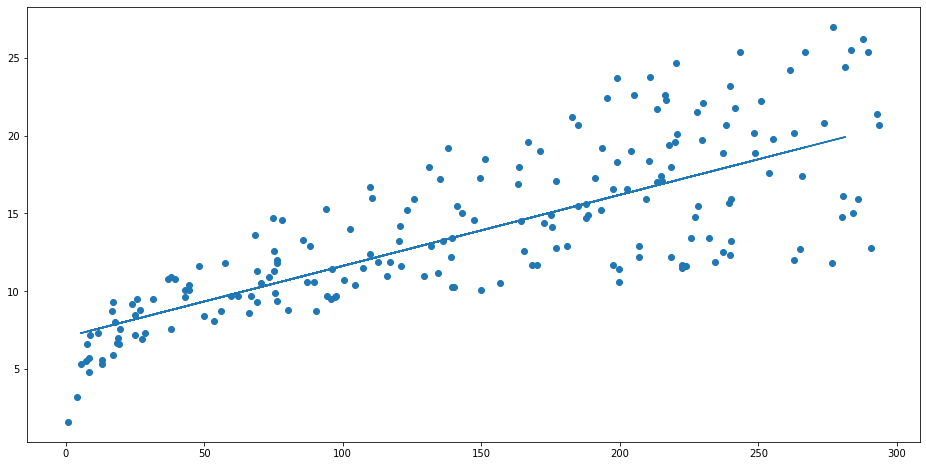

In [21]:
#Plotting the regression Line
plt.figure(figsize = (16, 8))

plt.scatter(X['TV'], y)

plt.plot(X_Test.iloc[:, 0], Pred, alpha=2)

In [22]:
#Displaying Metrics
data.iloc[:, 0].shape
est = sm.OLS(data['Sales'], sm.add_constant(data['TV']))
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.29e-41
Time:                        20:17:38   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0306      0.462     15.219      0.0

C:\Users\sragh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
#9 Some more inights
print ('MAE:', metrics.mean_absolute_error(Pred, y_Test))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(Pred, y_Test)))
print ('R-Squared:', metrics.r2_score(Pred, y_Test))

MAE: 2.476044181507283
RMSE: 3.148965788833073
R-Squared: 0.33820559387695215


As seen above, the accuracy is ~60% - 70% which is quite low.

### Why Multiple Linear Regression?
Simple linear regression is a useful approach for predicting a response on the basis of a single predictor variable. However, in practice we often have more than one predictor. For example, in the Advertising data, we have examined the relationship between sales and TV advertising. We also have data for the amount of money spent advertising on the radio and in newspapers, and we may want to know whether either of these two media is associated with sales.

One option is to run three separate simple linear regressions, each of which uses a different advertising medium as a predictor. For instance, we can fit a simple linear regression to predict sales on the basis of the amount spent on radio advertisements.

However, the approach of fitting a separate simple linear regression model for each predictor is not entirely satisfactory. First of all, it is unclear how to make a single prediction of sales given levels of the three advertising media budgets, since each of the budgets is associated with a separate regression equation. Second, each of the three regression equations ignores the other two media in forming estimates for the regression coefficients.
Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model so that it can directly accommodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model.

In [24]:
model_mlr = LinearRegression().fit(X_Train, y_Train)

In [25]:
Pred2 = model_mlr.predict(X_Test)

In [26]:
print("The linear model is: Sales = {:.5} + {:.5} (TV) + {:.5} (Radio) + {:.5} (Newspaper)".format(model_mlr.intercept_, model_mlr.coef_[0], model_mlr.coef_[1], model_mlr.coef_[2]))

The linear model is: Sales = 2.9646 + 0.044628 (TV) + 0.18982 (Radio) + 0.0010576 (Newspaper)


In [27]:
model_mlr.score(X_Train, y_Train)

0.8830878394545426

In [28]:
# Print out the statistics
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           8.35e-95
Time:                        20:17:38   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9523      0.318      9.280      0.0

C:\Users\sragh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
